<a href="https://colab.research.google.com/github/oneicar/ProyectoClase15/blob/main/Ejercicio2_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from collections import Counter

In [ ]:
import pandas as pd
blobs = ("https://github.com/oneicar/deep-learning/blob/7b4ed9342db5058deef85a470699644a75ce08f9/blobs.csv")


In [ ]:
df = pd.read_csv("blobs.csv", sep = ";", decimal=",")
print(df.head())

In [ ]:
X, y = make_blobs(n_samples=5000, centers=3, random_state=1)

In [ ]:
print(X.shape, y.shape)

(5000, 2) (5000,)


**Cantidad de instancias por etiqueta:**

In [ ]:
counter = Counter(y)
counter

Counter({2: 1666, 0: 1667, 1: 1667})

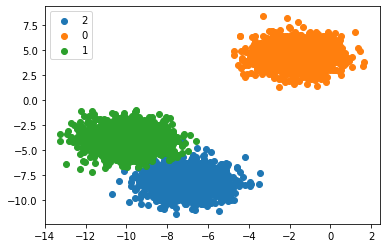

In [ ]:
for label, _ in counter.items():
    row_ix = np.where(y == label)
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

**Conjunto de train y test:**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X.shape

(5000, 2)

In [ ]:
X_train.shape

(3500, 2)

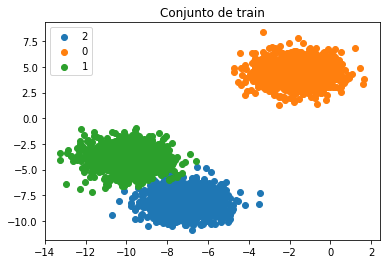

In [ ]:
for label, _ in counter.items():
    row_ix = np.where(y_train == label)
    plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=str(label))
plt.legend()
plt.title("Conjunto de train")
plt.show()

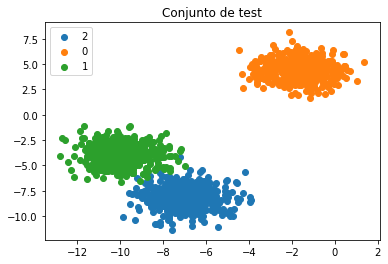

In [ ]:
for label, _ in counter.items():
    row_ix = np.where(y_test == label)
    plt.scatter(X_test[row_ix, 0], X_test[row_ix, 1], label=str(label))
plt.legend()
plt.title("Conjunto de test")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[0:5]

array([[ 1.5708477 ,  1.1355079 ],
       [ 1.13810607,  1.07009805],
       [ 1.00019128,  1.46362693],
       [-0.66578825, -0.83515247],
       [ 1.19112279,  1.31616326]])

In [ ]:
X_test[0:5]

array([[-1.20188135, -0.1548654 ],
       [ 1.15686809,  1.8170192 ],
       [ 1.22214642,  1.19767106],
       [ 1.08127348,  1.16781282],
       [-1.16392233, -0.24203972]])

**Red Neuronal Artificial RNA**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(2, activation="relu", input_shape=(X.shape[1],)))
model.add(Dense(5, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=10,
    verbose=0,
)

In [ ]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 772us/step - loss: 0.0121 - accuracy: 0.9967


[0.012072017416357994, 0.996666669845581]

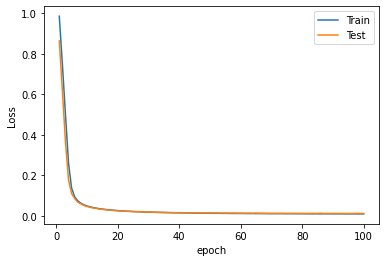

In [ ]:
plt.plot(range(1, len(history.epoch) + 1), history.history["loss"], label="Train")
plt.plot(range(1, len(history.epoch) + 1), history.history["val_loss"], label="Test")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend();

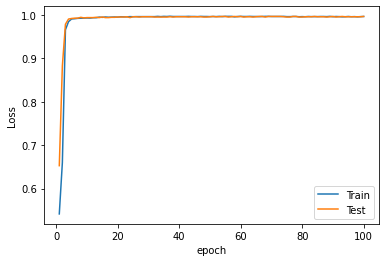

In [ ]:
plt.plot(range(1, len(history.epoch) + 1), history.history["accuracy"], label="Train")
plt.plot(range(1, len(history.epoch) + 1), history.history["val_accuracy"], label="Test")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend();

**Predicción:**

In [ ]:
y_pred = model.predict(X_test)
y_pred[0:10]

array([[3.1025607e-07, 9.9999964e-01, 5.7064248e-10],
       [1.0000000e+00, 4.9546935e-09, 8.1913418e-21],
       [1.0000000e+00, 5.3185611e-09, 7.0541836e-15],
       [1.0000000e+00, 4.3821721e-08, 1.7819322e-14],
       [1.2732914e-06, 9.9999869e-01, 1.0110164e-08],
       [3.3116315e-03, 3.0306352e-03, 9.9365777e-01],
       [5.2210195e-03, 6.1723393e-01, 3.7754500e-01],
       [3.3116315e-03, 3.0306352e-03, 9.9365777e-01],
       [3.3116315e-03, 3.0306352e-03, 9.9365777e-01],
       [3.3116315e-03, 3.0306352e-03, 9.9365777e-01]], dtype=float32)

In [ ]:
y_pred.shape

(1500, 3)

In [ ]:
y_pred[0:10]

array([[3.1025607e-07, 9.9999964e-01, 5.7064248e-10],
       [1.0000000e+00, 4.9546935e-09, 8.1913418e-21],
       [1.0000000e+00, 5.3185611e-09, 7.0541836e-15],
       [1.0000000e+00, 4.3821721e-08, 1.7819322e-14],
       [1.2732914e-06, 9.9999869e-01, 1.0110164e-08],
       [3.3116315e-03, 3.0306352e-03, 9.9365777e-01],
       [5.2210195e-03, 6.1723393e-01, 3.7754500e-01],
       [3.3116315e-03, 3.0306352e-03, 9.9365777e-01],
       [3.3116315e-03, 3.0306352e-03, 9.9365777e-01],
       [3.3116315e-03, 3.0306352e-03, 9.9365777e-01]], dtype=float32)

**Selección de la clase para cada predicción:**

In [ ]:
y_pred_label = np.argmax(y_pred, axis = 1)
y_pred_label[0:10]

array([1, 0, 0, 0, 1, 2, 1, 2, 2, 2])

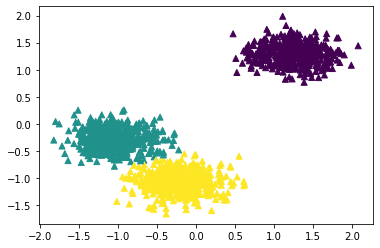

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_label, marker="^");

**Cuello de botella en la información:**

In [ ]:
model = Sequential()
model.add(Dense(2, activation="relu", input_shape=(X.shape[1],)))
model.add(Dense(4, activation="relu"))
model.add(Dense(3, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=10,
    verbose=1,
)

Epoch 1/100
350/350 [==============================] - 1s 2ms/step - loss: 1.0795 - accuracy: 0.4480 - val_loss: 1.0274 - val_accuracy: 0.5107
Epoch 2/100
350/350 [==============================] - 0s 1ms/step - loss: 0.8634 - accuracy: 0.6109 - val_loss: 0.6875 - val_accuracy: 0.6493
Epoch 3/100
350/350 [==============================] - 0s 1ms/step - loss: 0.6411 - accuracy: 0.6700 - val_loss: 0.5884 - val_accuracy: 0.6633
Epoch 4/100
350/350 [==============================] - 0s 1ms/step - loss: 0.5764 - accuracy: 0.6851 - val_loss: 0.5471 - val_accuracy: 0.6853
Epoch 5/100
350/350 [==============================] - 0s 1ms/step - loss: 0.5454 - accuracy: 0.7000 - val_loss: 0.5248 - val_accuracy: 0.6860
Epoch 6/100
350/350 [==============================] - 0s 1ms/step - loss: 0.5273 - accuracy: 0.7051 - val_loss: 0.5108 - val_accuracy: 0.6900
Epoch 7/100
350/350 [==============================] - 0s 1ms/step - loss: 0.5152 - accuracy: 0.7114 - val_loss: 0.5009 - val_accuracy: 0.6993

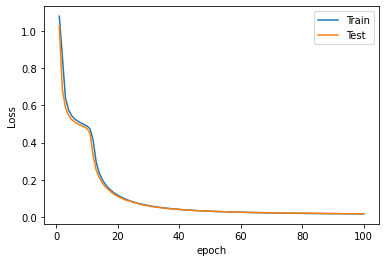

In [ ]:
plt.plot(range(1, len(history.epoch) + 1), history.history["loss"], label="Train")
plt.plot(range(1, len(history.epoch) + 1), history.history["val_loss"], label="Test")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend();

In [ ]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.9953


[0.017433369532227516, 0.9953333139419556]

In [ ]:
y_pred = model.predict(X_test)

y_pred_label = np.argmax(y_pred, axis = 1)

In [ ]:
y_pred_label[0:20]

array([1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2])

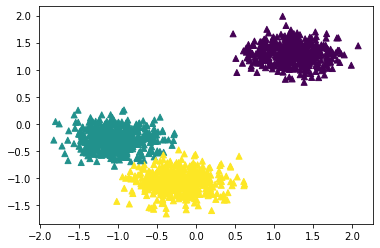

In [ ]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_label, marker="^");